# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Import Data

In [7]:
path=r'/Users/yasersouri/Desktop/data analysis/immersion 6/World University Rankings - 2021/data'

In [8]:
df = pd.read_csv(os.path.join(path, 'clean_df.csv'),index_col=False)

In [9]:
df.head()

,ranking,title,location,number_of_students,international_students%,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
0,1,University of Oxford,United Kingdom,20774,0.41,95.6,91.3,99.6,98.0,68.7,96.4
1,2,Stanford University,United States of America,16223,0.23,94.9,92.2,96.7,99.9,90.1,79.5
2,3,Harvard University,United States of America,21261,0.25,94.8,94.4,98.8,99.4,46.8,77.7
3,4,California Institute of Technology,United States of America,2238,0.33,94.5,92.5,96.9,97.0,92.7,83.6
4,5,Massachusetts Institute of Technology,United States of America,11276,0.34,94.4,90.7,94.4,99.7,90.4,90.0


## Heatmap 

In [11]:
# Create a subset excluding the "title" and "location" columns

sub = df[['number_of_students', 'international_students%', 'overall_score', 'teaching_score','research_score', 'citations_score','industry_income_score','international_outlook_score']]

In [12]:
sub.corr()

,number_of_students,international_students%,overall_score,teaching_score,research_score,citations_score,industry_income_score,international_outlook_score
number_of_students,1.000000,-0.113345,-0.004635,-0.014856,0.025557,-0.000505,0.012474,-0.034337
international_students%,-0.113345,1.000000,0.553258,0.416529,0.503301,0.429902,0.183369,0.821688
overall_score,-0.004635,0.553258,1.000000,0.816942,0.879109,0.849402,0.408212,0.634716
teaching_score,-0.014856,0.416529,0.816942,1.000000,0.893418,0.510889,0.446392,0.383401
research_score,0.025557,0.503301,0.879109,0.893418,1.000000,0.586754,0.533203,0.535454
citations_score,-0.000505,0.429902,0.849402,0.510889,0.586754,1.000000,0.199468,0.566244
industry_income_score,0.012474,0.183369,0.408212,0.446392,0.533203,0.199468,1.000000,0.184161
international_outlook_score,-0.034337,0.821688,0.634716,0.383401,0.535454,0.566244,0.184161,1.000000


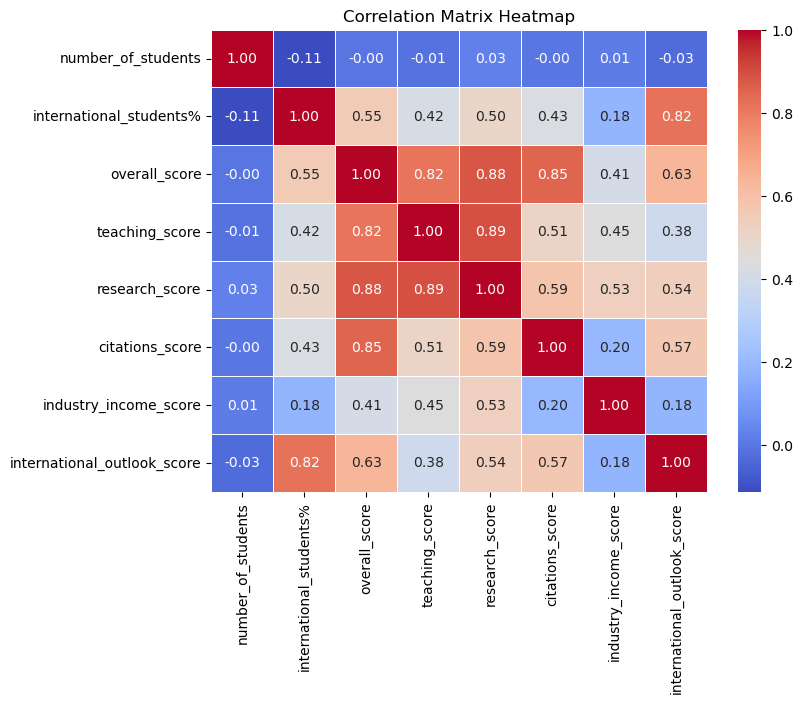

In [13]:
# Compute the correlation matrix
corr_matrix = sub.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the heatmap
plt.title("Correlation Matrix Heatmap")
plt.show()

### Key Observations in the Heatmap:

#### High Positive Correlations:

Teaching Score & Overall Score (0.82): Strong correlation—better teaching scores contribute significantly to the overall score.

Research Score & Overall Score (0.88): Research performance strongly influences overall scores.

Citations Score & Overall Score (0.85): More citations tend to improve overall rankings.

Teaching Score & Research Score (0.89): Institutions with strong research also tend to have strong teaching.

#### Negative Correlations

Number of Students & International Outlook Score (-0.03): Larger institutions may have slightly lower international outlook.

International Students % & Number of Students (-0.11): Larger universities tend to have a lower proportion of international students

#### Conclusion
The overall score is most influenced by research, teaching, and citations.

International outlook is linked to international student percentages.

Industry income does not strongly correlate with academic factors.

University size (number of students) does not strongly affect rankings.

## Scatterplots

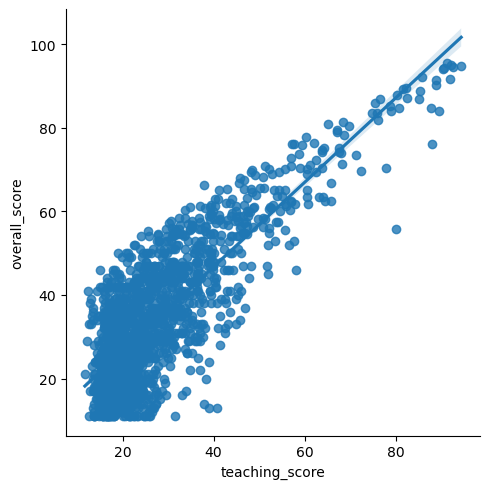

In [18]:
# Create a scatterplot for the Teaching Score & Overall Score columns in seaborn

sns.lmplot(x = 'teaching_score', y = 'overall_score', data = df)

Teaching Score & Overall Score (0.82): Strong correlation—better teaching scores contribute significantly to the overall score.

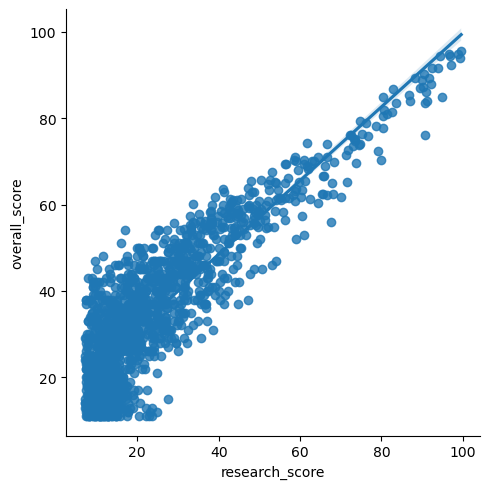

In [20]:
# Create a scatterplot for the Research Score & Overall Score columns in seaborn

sns.lmplot(x = 'research_score', y = 'overall_score', data = df)

Research Score & Overall Score (0.88): Research performance strongly influences overall scores.

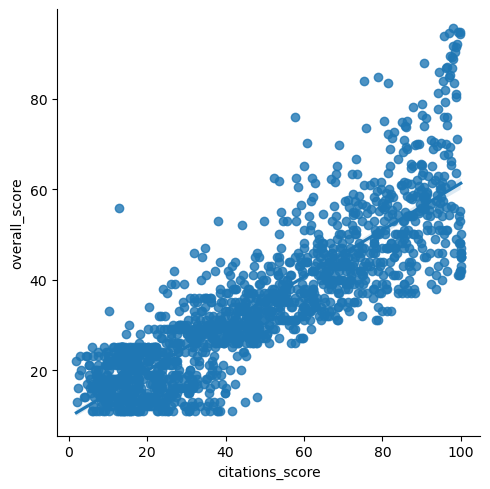

In [22]:
# Create a scatterplot for the Citations Score & Overall Score columns in seaborn

sns.lmplot(x = 'citations_score', y = 'overall_score', data = df)

More citations tend to improve overall rankings.

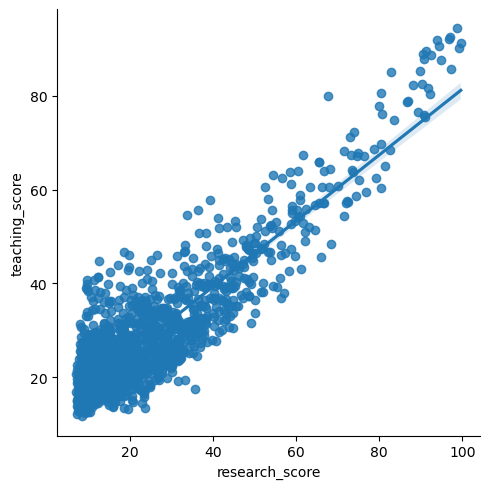

In [24]:
# Create a scatterplot for the research_score and teaching_score columns in seaborn

sns.lmplot(x = 'research_score', y = 'teaching_score', data = df)

## Pair plot

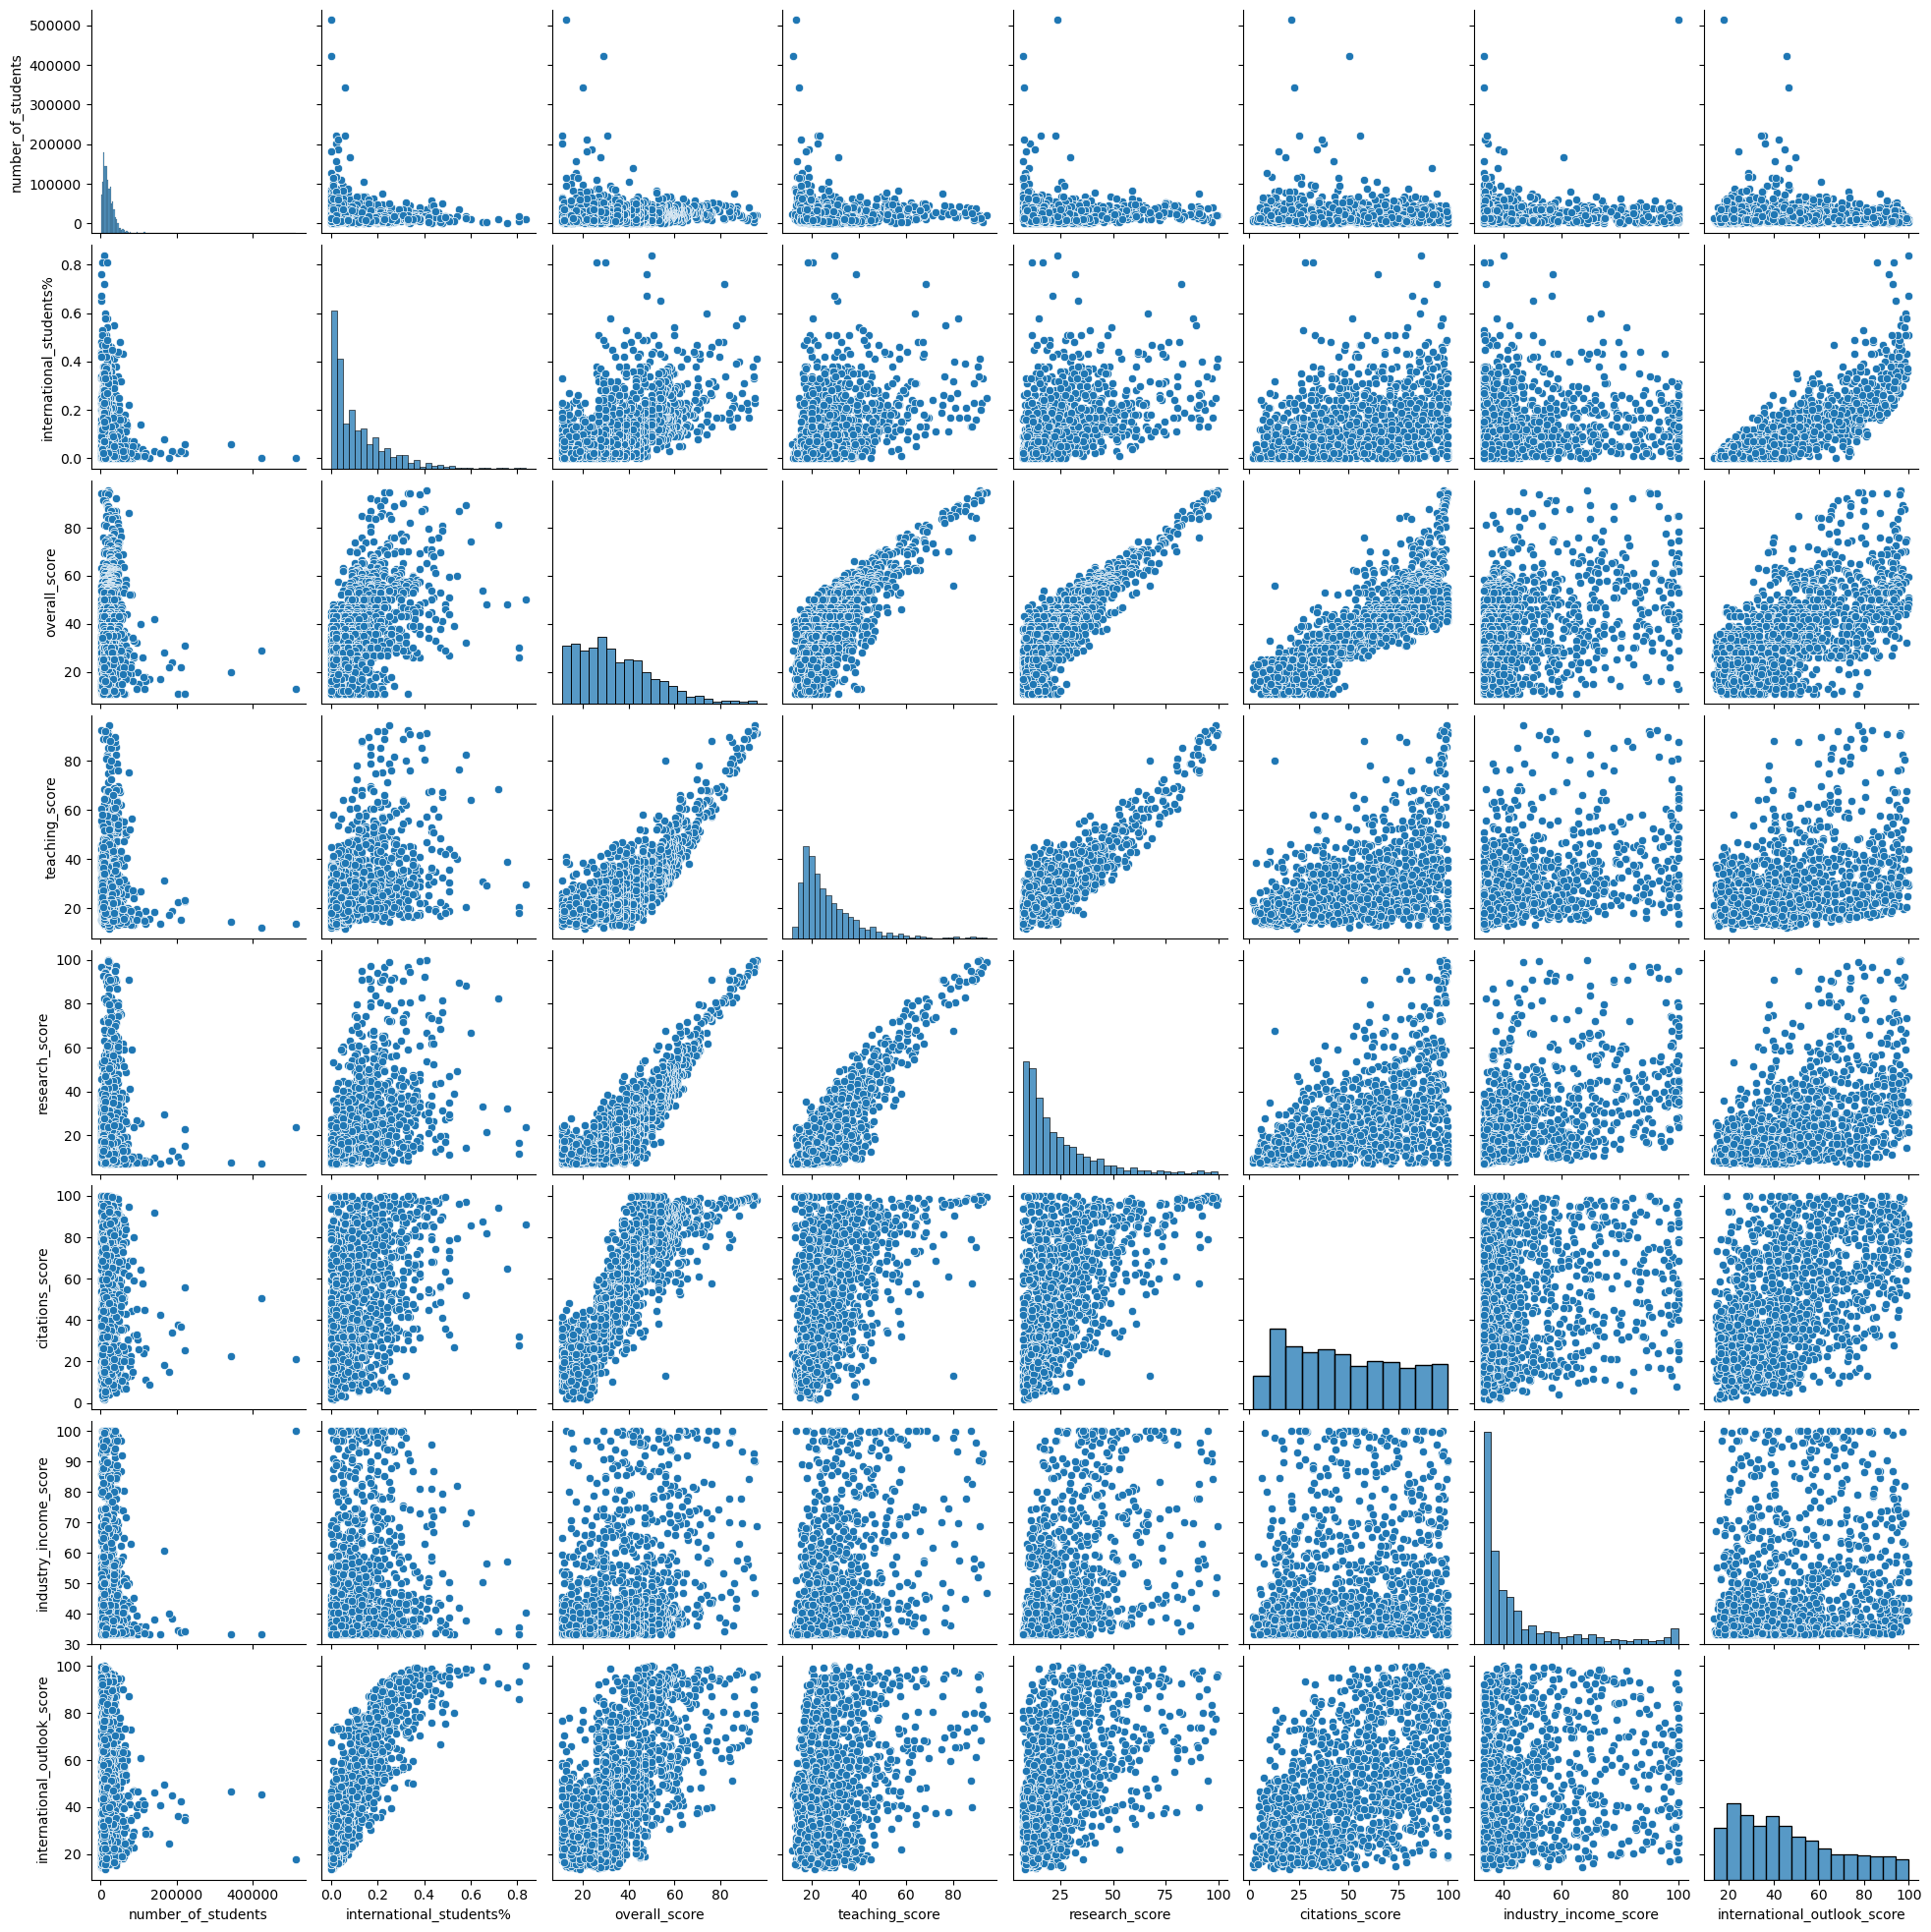

In [26]:
# Create a pair plot 

pair_plot= sns.pairplot(sub)

In [27]:
#export chart
pair_plot.figure.savefig(os.path.join(path,'pair_plot.png'))

#### Strong positive linear relationships between:

overall_score and teaching_score, research_score, citations_score → These scores seem to contribute directly to the overall ranking.

research_score and citations_score → More research output leads to more citations.

#### Skewed Distributions:
number_of_students: Highly right-skewed, meaning most universities have a lower student population, with a few having extremely large enrollments.

international_students%: Right-skewed, indicating that most universities have a small proportion of international students.

industry_income_score: Right-skewed, meaning that most universities have low industry funding, while a few receive very high funding.

#### Variables for Further Exploration
citations_score vs. research_score:

#### Why? 
The correlation looks strong, but a deeper analysis can confirm if research-intensive universities consistently receive more citations or if other factors influence citations.

## Categorical plot

<Axes: xlabel='overall_score', ylabel='Count'>

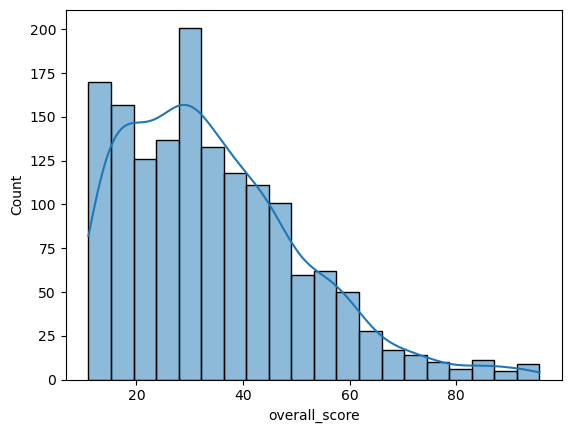

In [32]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['overall_score'], bins = 20, kde = True)

In [33]:
# Create overall_score categories 

df.loc[df['overall_score'] < 20, 'overall_score_category'] = 'low'
df.loc[(df['overall_score'] >= 20) & (df['overall_score'] < 50), 'overall_score_category'] = 'middle'
df.loc[df['overall_score'] >= 50, 'overall_score_category'] = 'high'

In [34]:
df['overall_score_category'].value_counts(dropna = False)

overall_score_category
middle    927
low       327
high      272
Name: count, dtype: int64

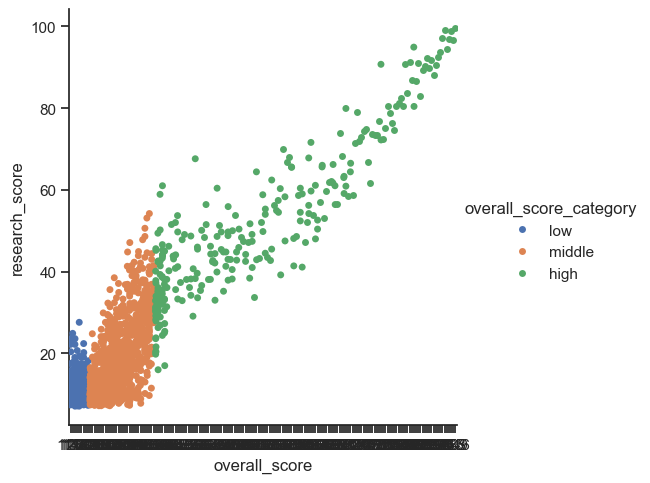

In [35]:
# Create a categorical plot in seaborn using the overall_score_category  created above & research_score

sns.set(style="ticks")
g = sns.catplot(x="overall_score", y="research_score", hue="overall_score_category", data=df)

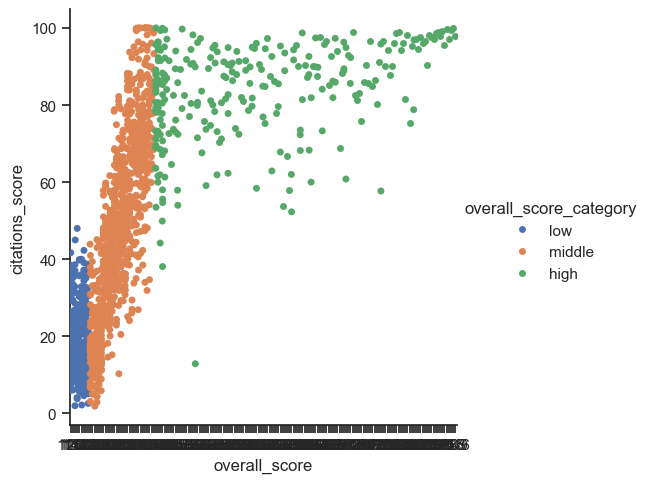

In [36]:
# Create a categorical plot in seaborn using the overall_score_category  created above & Citations Score 

sns.set(style="ticks")
g2 = sns.catplot(x="overall_score", y="citations_score", hue="overall_score_category", data=df)

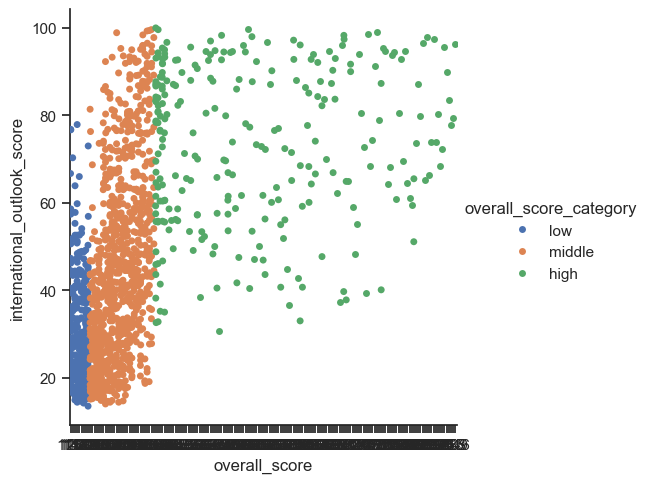

In [37]:
# Create a categorical plot in seaborn using the overall_score_category  created above & international_outlook_score 

sns.set(style="ticks")
g2 = sns.catplot(x="overall_score", y="international_outlook_score", hue="overall_score_category", data=df)

the higher the overall_score_category(x axis) the higher is the teaching_score, research_score, citations_score, and international_outlook_score 


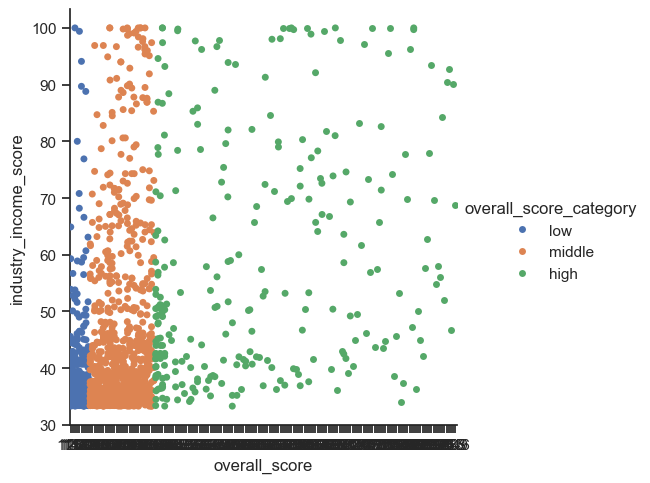

In [39]:
# Create a categorical plot in seaborn using the overall_score_category  industry_income_score and overall_score 

sns.set(style="ticks")
g2 = sns.catplot(x="overall_score", y="industry_income_score", hue="overall_score_category", data=df)

The correlation between industry_income_score and overall_score is low (~0.41).


#### 1. Does international outlook impact university rankings?
 In the correlation heatmap, international_outlook_score has a moderate positive correlation (~0.63) with overall_score.
 
 Explanation: This suggests that universities with strong internationalization (more international students, faculty, and collaborations) tend to rank higher.
 
#### 2. How does research output correlate with teaching quality?
Initial Observation: The correlation between research_score and teaching_score is high (~0.89).

Explanation: This strong positive relationship suggests that universities excelling in research also invest in teaching quality.

#### 3. How does industry income affect overall scores?
Initial Observation: The correlation between industry_income_score and overall_score is low (~0.41).

Explanation: This suggests that while industry partnerships bring funding, they do not strongly impact overall rankings.

#### 4. What factors contribute most to a university’s ranking?
Initial Observation: The strongest correlations with overall_score are:

research_score (0.88) → Research is a major driver of rankings.

teaching_score (0.82) → High teaching quality improves rankings.

citations_score (0.85) → More citations indicate academic impact.

Conclusion: Research, teaching, and citations are the strongest contributors to rankings.

###  hypotheses
 A higher international_outlook_score is associated with a higher overall_score.
 
 Universities with higher research_score tend to have higher teaching_score.
 
 overall_score is significantly influenced these factors: research_score, teaching_score, international_outlook_score, and citations_score.